<div align="center">
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=350>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=350>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png">
    </picture>
    </a>
    <br>
    <br>
    <a href="https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/JOIN US ON SLACK-4A154B?style=for-the-badge&logo=slack&logoColor=white" alt="Logo">
    </a>
    <a href="https://visual-layer.readme.io/discuss" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/DISCUSSION%20FORUM-slateblue?style=for-the-badge&logo=discourse&logoWidth=20" alt="Logo">
    </a>
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="Logo">
    </a>
    <a href="https://twitter.com/visual_layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white" alt="Logo">
    </a>
    <a href="https://www.youtube.com/@visual-layer" target="_blank" rel="noopener noreferrer">
    <img src="https://img.shields.io/badge/-YouTube-black.svg?style=for-the-badge&logo=youtube&colorB=red" alt="Logo">
    </a>
</div>

# Analyzing Hugging Face Datasets

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=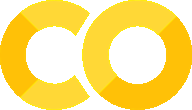&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/analyzing-hf-datasets.ipynb)
[![Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=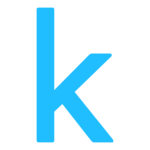&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/analyzing-hf-datasets.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/hugging-face-datasets)

This notebook shows how you can use fastdup to analyze any dataset from [Hugging Face Datasets](https://huggingface.co/docs/datasets/index).

We will analyze an image classification dataset for:

+ Duplicates / near-duplicates
+ Outliers
+ Wrong labels

## Installation

In [1]:
!pip install -Uq fastdup datasets

Now, test the installation. If there's no error message, we are ready to go.

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.41'

## Load Dataset

In this example we load the Tiny ImageNet dataset from [Hugging Face Datasets](https://huggingface.co/datasets)..

Tiny ImageNet contains 100,000 images of 200 classes (500 for each class) downsized to 64×64 colored images. Each class has 500 training images, 50 validation images, and 50 test images.

Let's load the dataset into our local directory.

In [3]:
from fastdup.datasets import FastdupHFDataset

In [4]:
dataset = FastdupHFDataset("zh-plus/tiny-imagenet", split="train")

INFO:root:No changes in dataset folder: /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images. Skipping image conversion.


We can inspect the `dataset` object.

In [5]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 100000
})

In [6]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

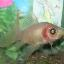

In [7]:
dataset[0]['image']

In [8]:
dataset[0]['label']

0

In [9]:
dataset.annotations

,filename,label
0,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/142/71384.jpg,142
1,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/142/71204.jpg,142
2,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/142/71036.jpg,142
3,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/142/71014.jpg,142
4,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/142/71334.jpg,142
...,...,...
99995,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/127/63864.jpg,127
99996,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/127/63822.jpg,127
99997,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/127/63874.jpg,127
99998,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/127/63824.jpg,127


## Run fastdup

In [10]:
fd = fastdup.create(input_dir=dataset.img_dir)
fd.run(annotations=dataset.annotations)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.


                                                                               
   ad88                                          88                            
  d8"                             ,d             88                            
  88                              88             88                            
MM88MMM  ,adPPYYba,  ,adPPYba,  MM88MMM  ,adPPYb,88  88       88  8b,dPPYba,   
  88     ""     `Y8  I8[    ""    88    a8"    `Y88  88       88  88P'    "8a  
  88     ,adPPPPP88   `"Y8ba,     88    8b       88  88       88  88       d8  
  88     88,    ,88  aa    ]8I    88,   "8a,   ,d88  "8a,   ,a88  88b,   ,a8"  
  88     `"8bbdP"Y8  `"YbbdP"'    "Y888  `"8bbdP"Y8   `"YbbdP'Y8  88`YbbdP"'   
                                                                  88           
                                                                  88           


2023-09-19 21:40:45 [INFO] Going to loop 

0

## Inspect Issues

There are several methods we can use to inspect the issues found:

```python
fd.vis.duplicates_gallery()    # create a visual gallery of duplicates
fd.vis.outliers_gallery()      # create a visual gallery of anomalies
fd.vis.component_gallery()     # create a visualization of connected components
fd.vis.stats_gallery()         # create a visualization of images statistics (e.g. blur)
fd.vis.similarity_gallery()    # create a gallery of similar images
```

/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))
/home/dnth/anaconda3/envs/fastdup/lib/python3.10/site-packages/fastdup/galleries.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[out_col] = df[in_col].apply(lambda x: get_label_func.get(x, MISSING_LABEL))


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



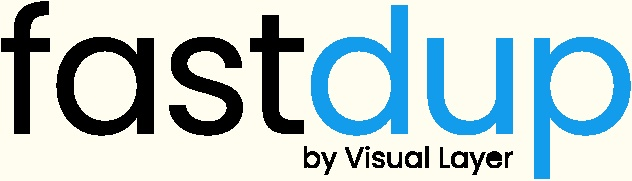
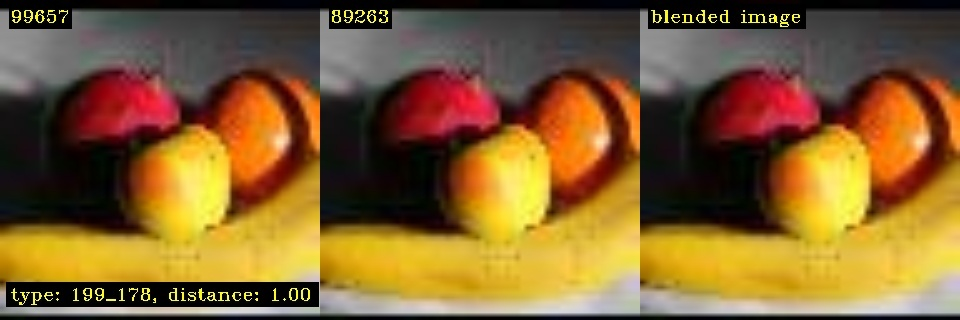
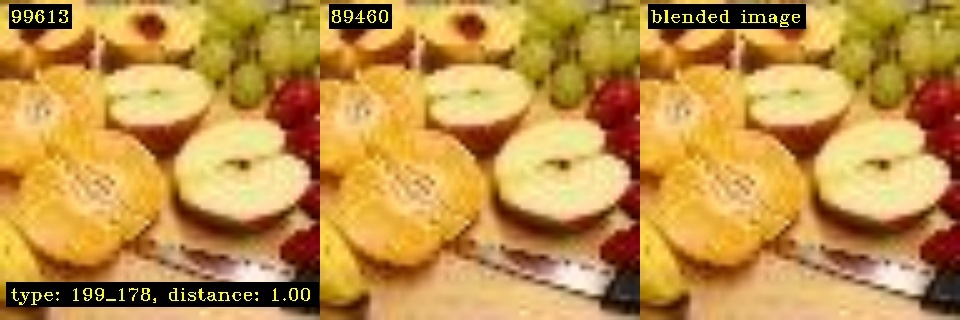
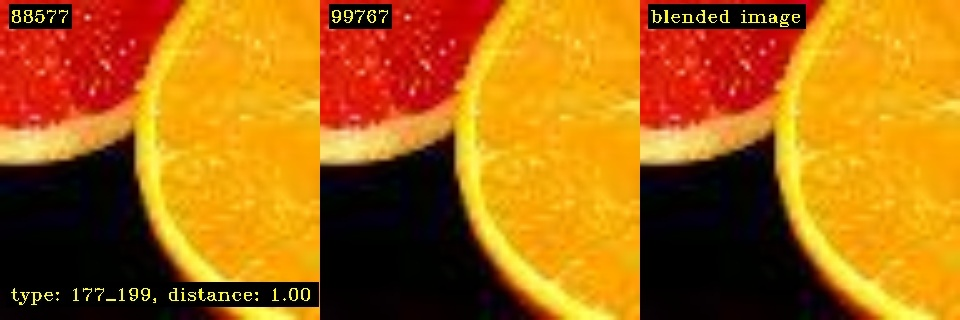
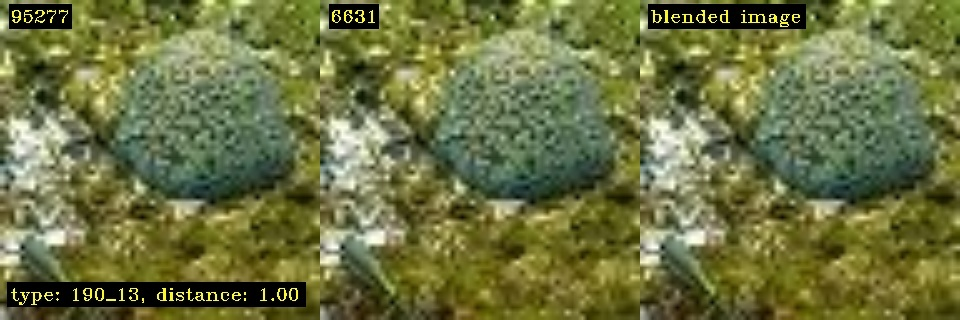
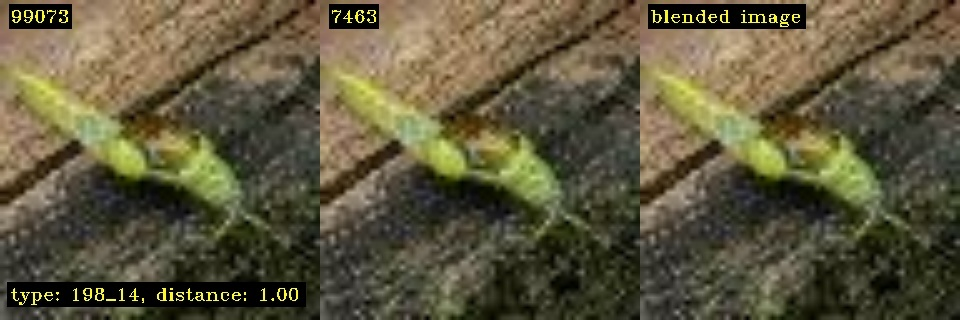
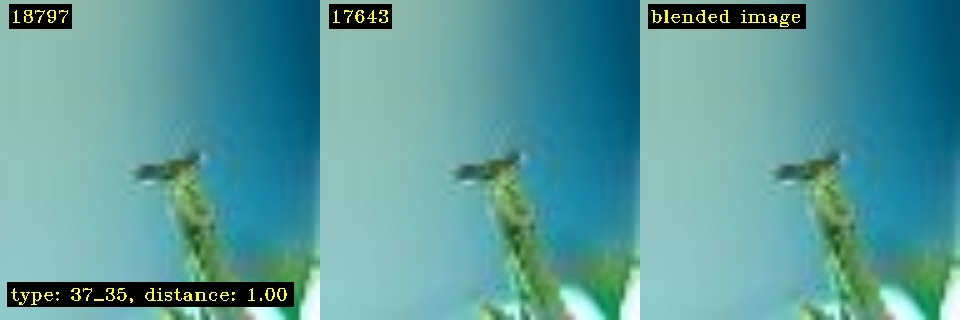
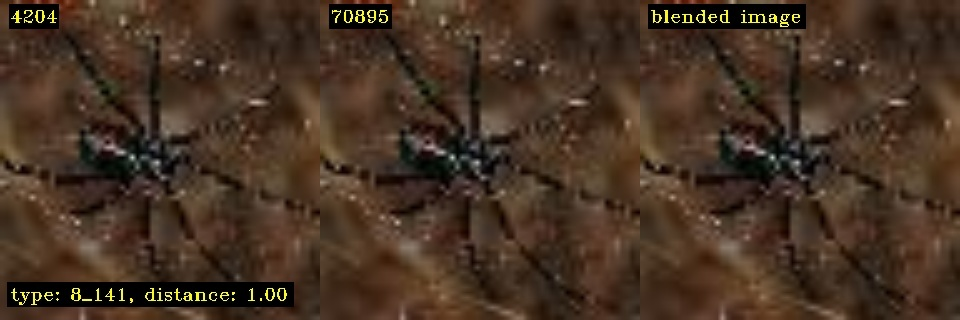
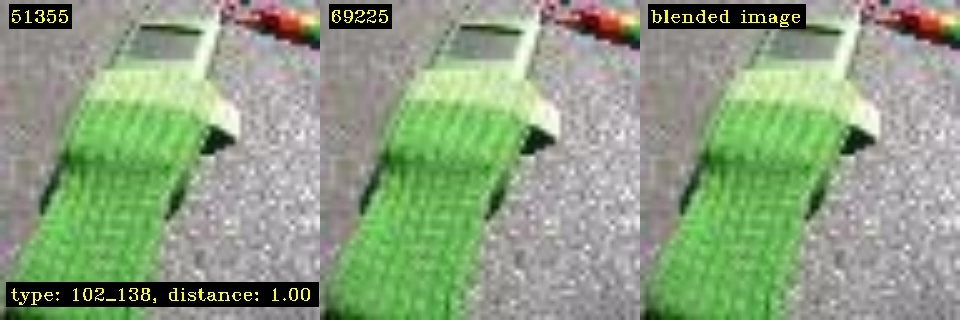
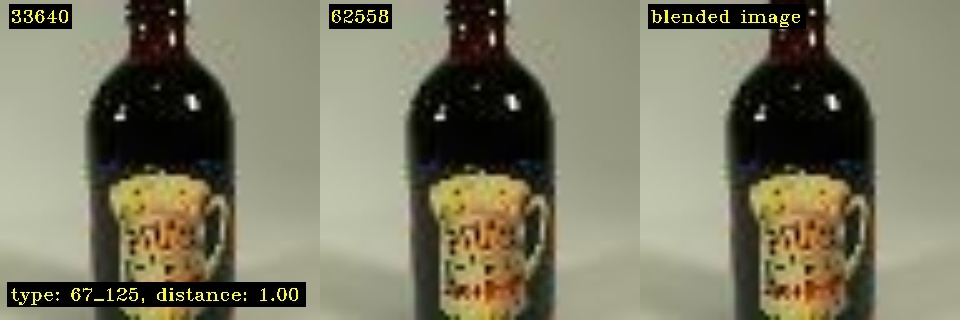
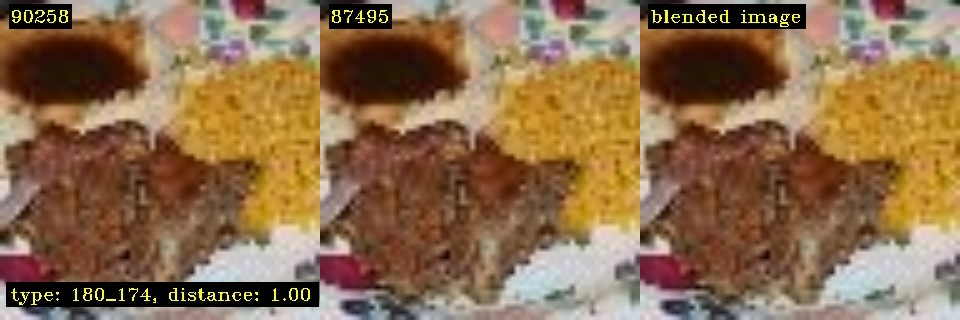
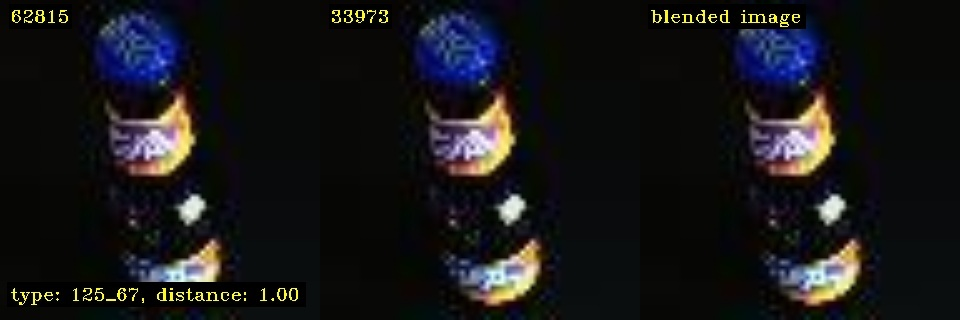
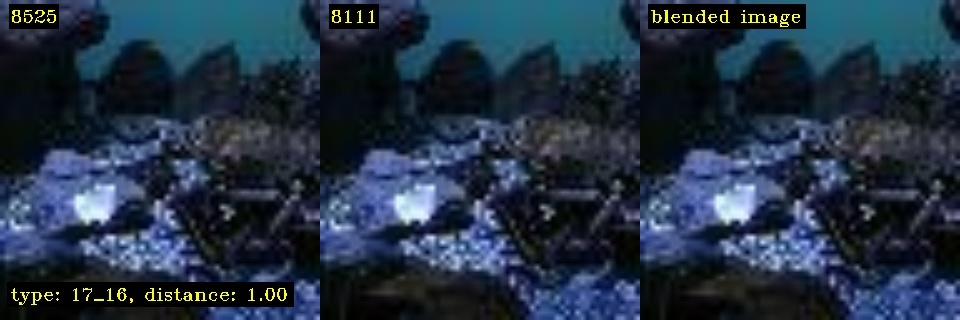

0

In [11]:
fd.vis.duplicates_gallery()

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



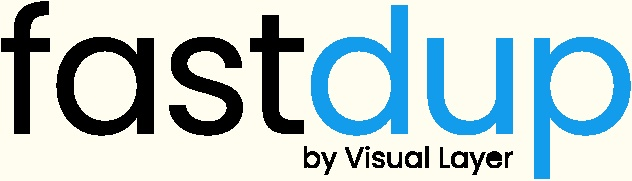
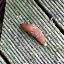
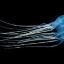
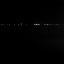
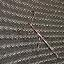
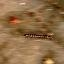
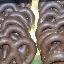
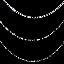
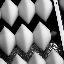
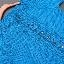
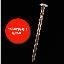
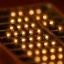
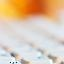
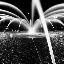
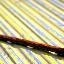
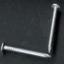
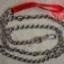
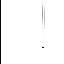
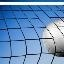
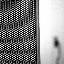
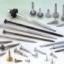

0

In [12]:
fd.vis.outliers_gallery()

Generating gallery:   0%|          | 0/7287 [00:00<?, ?it/s]

Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similar images visual view in  work_dir/galleries/similarity.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



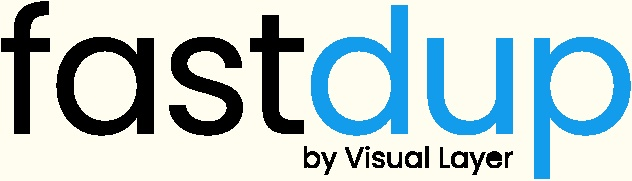
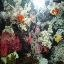
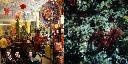
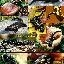
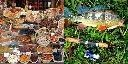
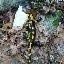
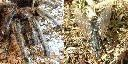
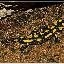
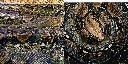
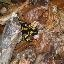
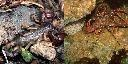
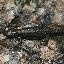
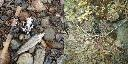
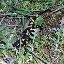
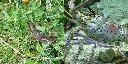
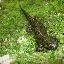
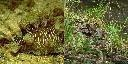
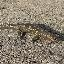
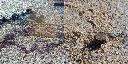
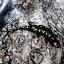
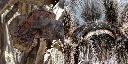
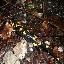
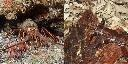
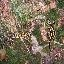
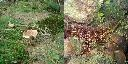
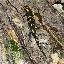
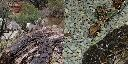
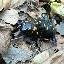
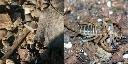
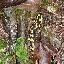
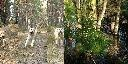
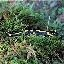
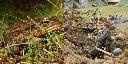
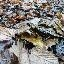
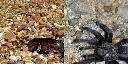
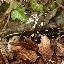
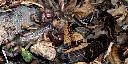
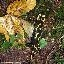
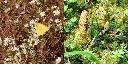
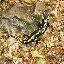
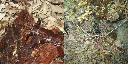

,from,to,label,label2,distance,score,length
4,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/0/35.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/190/95331.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/85/42517.jpg]","[0, 0]","[190, 85]","[0.905423, 0.906011]",0.0,2
14,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/1/513.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/166/83446.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/85/42716.jpg]","[1, 1]","[166, 85]","[0.907565, 0.911764]",0.0,2
16,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/1/515.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/93/46608.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/9/4557.jpg]","[1, 1]","[93, 9]","[0.931858, 0.933797]",0.0,2
19,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/1/521.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/5/2731.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/5/2756.jpg]","[1, 1]","[5, 5]","[0.915641, 0.916001]",0.0,2
68,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/1/650.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/17/8647.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/7/3800.jpg]","[1, 1]","[17, 7]","[0.909015, 0.923444]",0.0,2
...,...,...,...,...,...,...,...
7273,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49882.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49977.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49544.jpg]","[99, 99]","[99, 99]","[0.904351, 0.913638]",100.0,2
7275,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49895.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49799.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49806.jpg]","[99, 99]","[99, 99]","[0.92261, 0.92414]",100.0,2
7279,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49919.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49734.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49875.jpg]","[99, 99]","[99, 99]","[0.904262, 0.913118]",100.0,2
7283,/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49940.jpg,"[/home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49877.jpg, /home/dnth/.cache/huggingface/datasets/tiny-imagenet/jpg_images/99/49858.jpg]","[99, 99]","[99, 99]","[0.91175, 0.914616]",100.0,2


In [13]:
fd.vis.similarity_gallery(slice='diff')

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a Hugging Face Dataset. You can use similar methods to run on other similar datasets on [Huggging Face Datasets](https://huggingface.co/datasets).

Try it out and let us know what issues you find.


Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler - A faster and easier way to diagnose and visualize dataset issues

If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

VL Profiler is free to get started. Upload up to 1,000,000 images for analysis at zero cost!

[Sign up](https://app.visual-layer.com) now.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/github_banner_profiler.gif)](https://app.visual-layer.com)

As usual, feedback is welcome! Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).

<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Slack Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>

<center> 
    <a href="https://www.linkedin.com/company/visual-layer/" target="_blank" style="text-decoration: none;"> LinkedIn </a> •
    <a href="https://twitter.com/visual_layer" target="_blank" style="text-decoration: none;"> Twitter </a>
</center>